In [95]:
import tensorflow as tf

# Set the path to dataset directory

dataset_path = '/home/jyunth/repos/ToddlerShieldAI/dataset'

# Set the image and the batch size
image_size = (64,64)
batch_size = 32

#Loading the dataset
data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size = image_size,
    batch_size = batch_size
)

Found 1491 files belonging to 4 classes.


In [96]:
import numpy as np
from matplotlib import pyplot as plt

In [97]:
data_iterator = data.as_numpy_iterator()

2023-05-20 08:19:45.940373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]
2023-05-20 08:19:45.940992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]


In [98]:
batch = data_iterator.next()

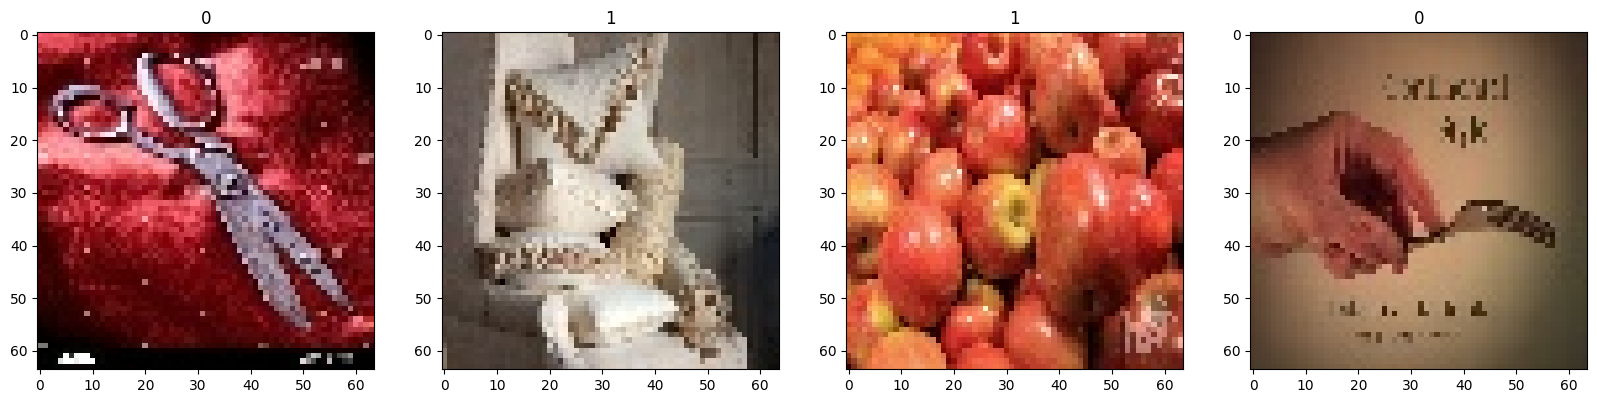

In [99]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [100]:
data = data.map(lambda x,y: (x/255, y))

In [101]:
data.as_numpy_iterator().next()

2023-05-20 08:19:55.112803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]
2023-05-20 08:19:55.113212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]


(array([[[[0.9882353 , 1.        , 0.972549  ],
          [0.9882353 , 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 1.        ],
          ...,
          [0.7019608 , 0.6117647 , 0.20392157],
          [0.79607844, 0.7019608 , 0.30980393],
          [0.8784314 , 0.7921569 , 0.40392157]],
 
         [[0.9843137 , 0.99607843, 0.96862745],
          [0.9882353 , 0.99607843, 0.9764706 ],
          [0.99215686, 0.99607843, 1.        ],
          ...,
          [0.7137255 , 0.62352943, 0.21568628],
          [0.78431374, 0.6901961 , 0.30588236],
          [0.827451  , 0.7372549 , 0.36078432]],
 
         [[0.9843137 , 0.99215686, 0.972549  ],
          [0.9843137 , 0.99215686, 0.98039216],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.7137255 , 0.627451  , 0.22745098],
          [0.78431374, 0.6862745 , 0.32156864],
          [0.8117647 , 0.7137255 , 0.36078432]],
 
         ...,
 
         [[0.85490197, 0.8666667 , 0.65882355],
          [0.88627

# Dividing dataset

In [102]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [103]:
train_size

32

In [104]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building the deep learning model

In [105]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [107]:
model = Sequential()

In [108]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 16)        

# Time to train lesgoo

In [111]:
logdir='logs'

In [112]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [113]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


2023-05-20 08:20:30.079520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]
2023-05-20 08:20:30.079922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]


31/32 [============================>.] - ETA: 0s - loss: 0.6234 - accuracy: 0.6502

2023-05-20 08:20:32.441805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]
2023-05-20 08:20:32.442359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]


32/32 [==============================] - 3s 52ms/step - loss: 0.6200 - accuracy: 0.6533 - val_loss: 0.5835 - val_accuracy: 0.6701
Epoch 2/20
32/32 [==============================] - 2s 50ms/step - loss: 0.5179 - accuracy: 0.7275 - val_loss: 0.4380 - val_accuracy: 0.8021
Epoch 3/20
32/32 [==============================] - 2s 51ms/step - loss: 0.4748 - accuracy: 0.7461 - val_loss: 0.4392 - val_accuracy: 0.8090
Epoch 4/20
32/32 [==============================] - 2s 50ms/step - loss: 0.4414 - accuracy: 0.7764 - val_loss: 0.4318 - val_accuracy: 0.8021
Epoch 5/20
32/32 [==============================] - 2s 47ms/step - loss: 0.3997 - accuracy: 0.7842 - val_loss: 0.3516 - val_accuracy: 0.8229
Epoch 6/20
32/32 [==============================] - 1s 46ms/step - loss: 0.3583 - accuracy: 0.8057 - val_loss: 0.3574 - val_accuracy: 0.8646
Epoch 7/20
32/32 [==============================] - 2s 46ms/step - loss: 0.3196 - accuracy: 0.8291 - val_loss: 0.3585 - val_accuracy: 0.8299
Epoch 8/20
32/32 [======

# Plotting the performance (self reference)

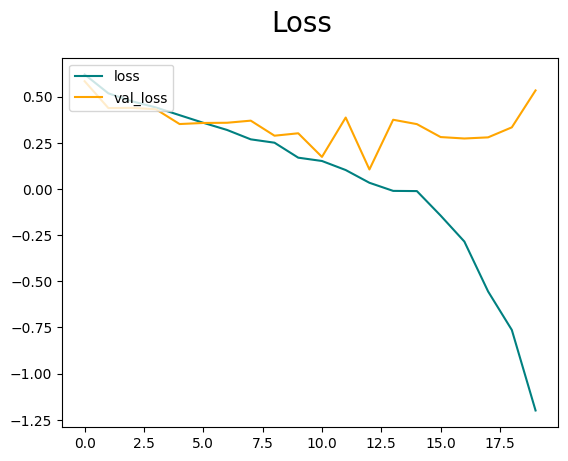

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

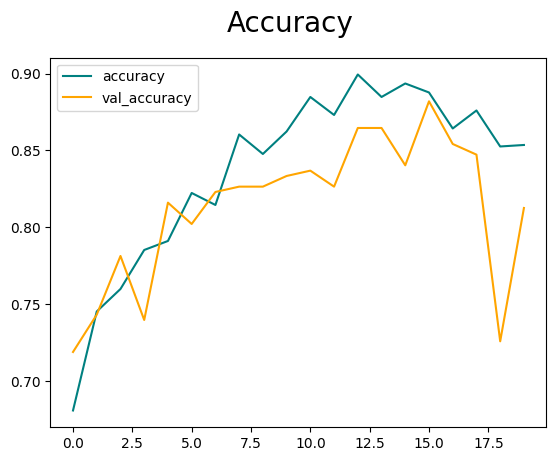

In [69]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [71]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [72]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-20 08:18:33.232638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]
2023-05-20 08:18:33.233332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1491]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 26ms/step


In [73]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.85714287, shape=(), dtype=float32) tf.Tensor(0.84615386, shape=(), dtype=float32) tf.Tensor(0.8203125, shape=(), dtype=float32)


In [74]:
import cv2


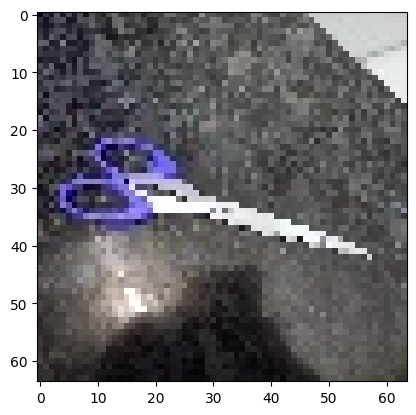

In [75]:
img = cv2.imread('own_test_resized/harmfool.jpeg')
plt.imshow(img)
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 78ms/step


In [77]:
yhat

array([[1.]], dtype=float32)

In [78]:
if yhat < 0.5: 
    print(f'Predicted class is Harmful')
else:
    print(f'Predicted class is Harmless')


Predicted class is Harmless


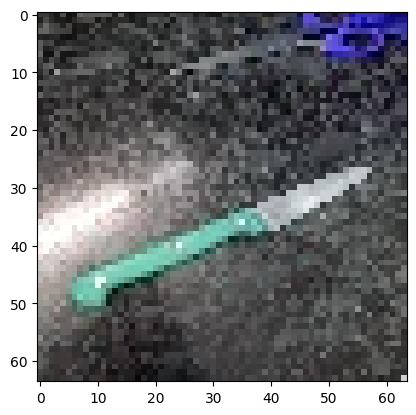

In [79]:
img = cv2.imread('own_test_resized/harmfool2.jpeg')
plt.imshow(img)
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 22ms/step


In [81]:
if yhat < 0.5: 
    print(f'Predicted class is Harmful')
else:
    print(f'Predicted class is Harmless')

Predicted class is Harmless


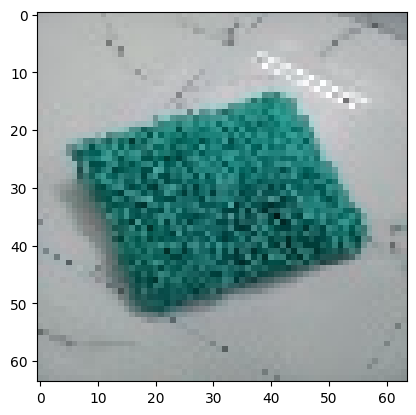

In [82]:
img = cv2.imread('own_test_resized/pls_be_harmless.jpeg')
plt.imshow(img)
plt.show()

In [83]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 30ms/step


In [84]:
if yhat < 0.5: 
    print(f'Predicted class is Harmful')
else:
    print(f'Predicted class is Harmless')

Predicted class is Harmless


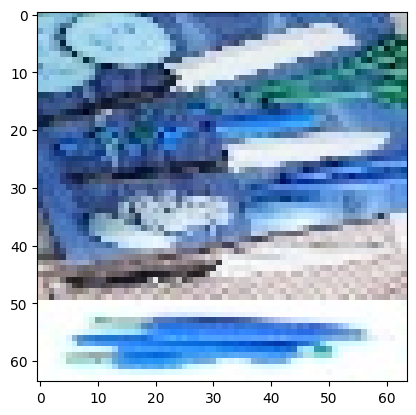

In [85]:
img = cv2.imread('own_test_resized/1.jpg')
plt.imshow(img)
plt.show()

In [86]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 22ms/step


In [87]:
if yhat < 0.5: 
    print(f'Predicted class is Harmful')
else:
    print(f'Predicted class is Harmless')

Predicted class is Harmful


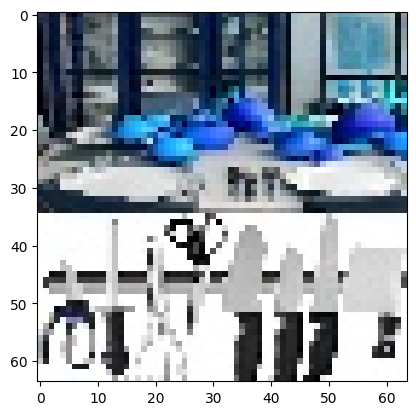

In [88]:
img = cv2.imread('own_test_resized/2.jpg')
plt.imshow(img)
plt.show()

In [89]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 25ms/step


In [90]:
if yhat < 0.5: 
    print(f'Predicted class is Harmful')
else:
    print(f'Predicted class is Harmless')

Predicted class is Harmless


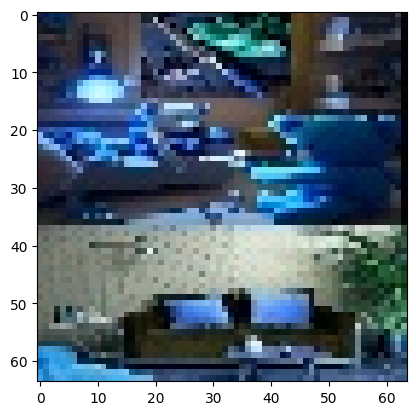

In [91]:
img = cv2.imread('own_test_resized/3.jpg')
plt.imshow(img)
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 22ms/step


In [93]:
if yhat < 0.5: 
    print(f'Predicted class is Harmful')
else:
    print(f'Predicted class is Harmless')

Predicted class is Harmless


from keras.models import load_model
import os
model.save(os.path.join('models','imageclassifier.h5'))